## 1- Import Libraries

In [74]:
import pandas as pd
import numpy  as np

import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib

%matplotlib inline

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

## 2- Upload the Dataset

In [78]:
# Upload data

df = pd.read_csv(link)

In [79]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## 3- Check the data

### 3.1- Initial Analysis

In [80]:
df.shape

(13320, 9)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### 3.2- Check the null values

In [82]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### 3.3- Check dataset

In [83]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# 4. Data Cleaning

## 4.1- Data Cleaning and Manipulations

### 4.1- Impute the missing values

In [84]:
# Check the null values again 

df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [85]:
# Fill the null values based on the datatypes

def impute_null_values(df):

    # if blank values in columns > 0 then add this columns into list
    for i in df.columns:
        
        if df[i].isnull().sum() >0 :
            
            # check the datatypes of the column, fillna with mean if float values, else use mode 

            if df[i].dtypes == 'float64':
                
                # Here is median can also be used
                df[i] = df[i].fillna(df[i].mean())
            else:
                df[i] = df[i].fillna(df[i].mode()[0])

    return df

In [86]:
df = impute_null_values(df)

In [87]:
# Check the null values again 

df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [88]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


## 4.2- Data Manipulations

### 4.2.1 Drop irrelevant columns

In [89]:
# Availability is not seem a relative feature, we can simply drop it

df = df.drop(columns=['availability'], axis=1)

In [90]:
df.head(2)

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


### 4.2.2 Clean the the Size column

In [91]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00


In [92]:
# Size of room have standardize and convert to integer

df['size'] = df['size'].apply(lambda x: x.split(" ", 1)[0])                            
df['size'] = df['size'].astype(int)

### 4.2.3 Clean and change the datatype of the total_sqft column

In [93]:
def check_float(x): 
    try:
        float(x)
        
    except:
        return False
    
    return True

In [94]:
df[df['total_sqft'].apply(check_float)].head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,GrrvaGr,1200,2.0,1.0,51.00


In [95]:
#df['check_float_total_sqft'] = df['total_sqft'].apply(check_float)
#df['check_float_total_sqft'].value_counts()

In [96]:
def clean_sqft_column(x):
    
    token = x.split('-')
    
    if len(token) == 2:
        return(float(token[0]) + float(token[1]))/2
    
    try: 
        return(float(x))
    
    except: 
        return None

In [97]:
df['total_sqft'] = df['total_sqft'].apply(clean_sqft_column)

In [98]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,GrrvaGr,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,GrrvaGr,1200.0,2.0,1.0,51.00


### 4.2.4 Calculate the unit sqft price Column

In [99]:
df['unit_price'] = df['price']*100000/df['total_sqft']

In [100]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,unit_price
0,Super built-up Area,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,GrrvaGr,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,GrrvaGr,1200.0,2.0,1.0,51.00,4250.000000


### 4.2.5 Change the balcony Column

In [101]:
# Number of balcony should be a integer value

df['balcony'] = df['balcony'].astype(int)

### 4.2.6 Drop the Society column 

In [102]:
# We have the address column Society column looks duplicate

df = df.drop(columns=['society'], axis=1)

### 4.2.7 Change the bath Column

In [103]:
# Number of bath should be a integer value

df['bath'] = df['bath'].astype(int)

# Limit the number of baths less than 8

df = df[df['bath'] < 8]

In [104]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,unit_price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,51.00,4250.000000


### 4.2.8 Change the location Column

In [105]:
df.shape

(13180, 8)

In [106]:
rare_loc = df.groupby(['location'])['size'].count().reset_index()
rare_loc = rare_loc.sort_values(['size'], ascending=[False])
rare_loc = rare_loc[rare_loc['size'] <10]

rare_loc = rare_loc.reset_index(drop=True)
rare_loc = rare_loc[['location']]

In [107]:
rare_loc = rare_loc['location'].to_list()

In [108]:
df['location'] = df['location'].apply(lambda x: 'other' if x in rare_loc else x)

## 4.3 Exploratory Analysis and Outlier Detection

### 4.3.1 Exploratory Analysis for area_type

In [109]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13180 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13180 non-null  object 
 1   location    13180 non-null  object 
 2   size        13180 non-null  int64  
 3   total_sqft  13136 non-null  float64
 4   bath        13180 non-null  int64  
 5   balcony     13180 non-null  int64  
 6   price       13180 non-null  float64
 7   unit_price  13136 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 926.7+ KB


,area_type,location,size,total_sqft,bath,balcony,price,unit_price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,51.00,4250.000000


No handles with labels found to put in legend.


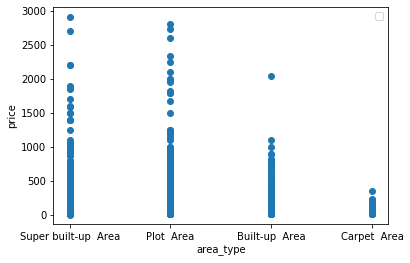

In [110]:
# Relationship between columns
plt.scatter(df['area_type'], df['price'])

plt.xlabel('area_type')
plt.ylabel('price')
plt.legend()

### 4.3.2 Exploratory Analysis for size

No handles with labels found to put in legend.


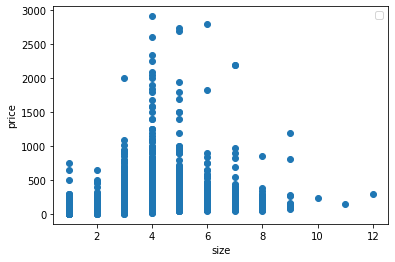

In [111]:
# Relationship between columns
plt.scatter(df['size'], df['price'])

plt.xlabel('size')
plt.ylabel('price')
plt.legend()

In [112]:
# Drop the data size is bigger than 9 

df = df[df['size']<10]

No handles with labels found to put in legend.


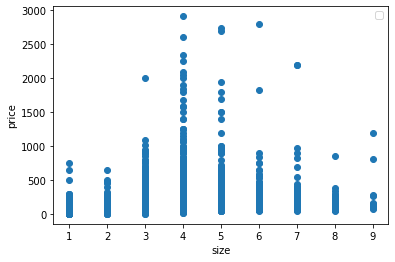

In [113]:
# Relationship between columns
plt.scatter(df['size'], df['price'])

plt.xlabel('size')
plt.ylabel('price')
plt.legend()

### 4.3.3 Exploratory Analysis for bath

No handles with labels found to put in legend.


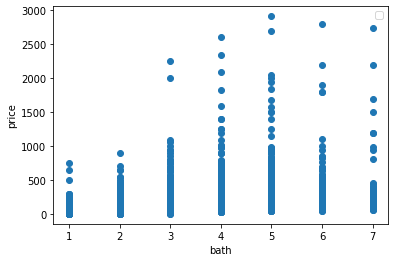

In [114]:
# Relationship between columns
plt.scatter(df['bath'], df['price'])

plt.xlabel('bath')
plt.ylabel('price')
plt.legend()

### 4.3.4 Exploratory Analysis for balcony

No handles with labels found to put in legend.


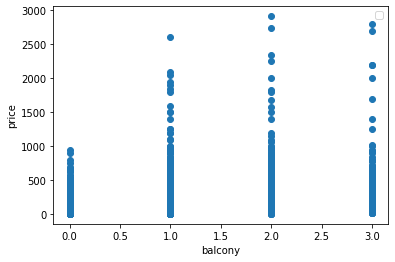

In [115]:
# Relationship between columns
plt.scatter(df['balcony'], df['price'])

plt.xlabel('balcony')
plt.ylabel('price')
plt.legend()

### 4.3.5 Exploratory Analysis

In [116]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13177 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13177 non-null  object 
 1   location    13177 non-null  object 
 2   size        13177 non-null  int64  
 3   total_sqft  13133 non-null  float64
 4   bath        13177 non-null  int64  
 5   balcony     13177 non-null  int64  
 6   price       13177 non-null  float64
 7   unit_price  13133 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 926.5+ KB


,area_type,location,size,total_sqft,bath,balcony,price,unit_price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,51.00,4250.000000


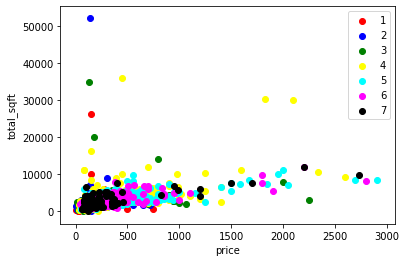

In [117]:
# Relationship between columns
 
color     = ['Red','Blue','Green','Yellow','Cyan','Magenta','Black']    
bath      = [1,2,3,4,5,6,7]
    
for i in range(len(bath)):
    
    df_1 = df[df['bath'] == bath[i]] 
    plt.scatter(df_1['price'], df_1['total_sqft'], c=color[i], label=bath[i])

plt.xlabel('price')
plt.ylabel('total_sqft')
plt.legend()

In [118]:
df.shape

(13177, 8)

In [119]:
# 6 and 7 rooms price is so low, drop the all recors if 7 baths and price less than 2000

df = df[~((df['bath'] >5) & (df['price'] < 2000))]

In [120]:
df.shape

(12809, 8)

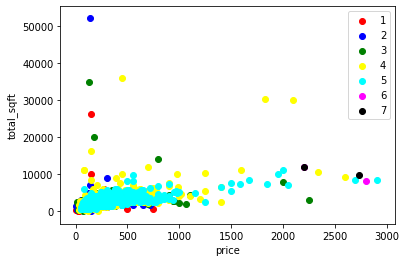

In [121]:
# Relationship between columns
 
color     = ['Red','Blue','Green','Yellow','Cyan','Magenta','Black']    
bath      = [1,2,3,4,5,6,7]
    
for i in range(len(bath)):
    
    df_1 = df[df['bath'] == bath[i]] 
    plt.scatter(df_1['price'], df_1['total_sqft'], c=color[i], label=bath[i])

plt.xlabel('price')
plt.ylabel('total_sqft')
plt.legend()

### 4.3.6 Further Exploratory Analysis

In [122]:
df.head(2)

,area_type,location,size,total_sqft,bath,balcony,price,unit_price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,120.00,4615.384615


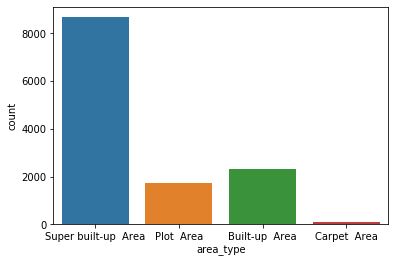

In [123]:
sns.countplot(df['area_type'])

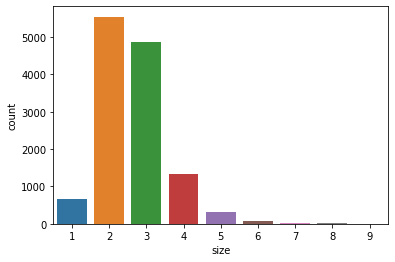

In [124]:
sns.countplot(df['size'])

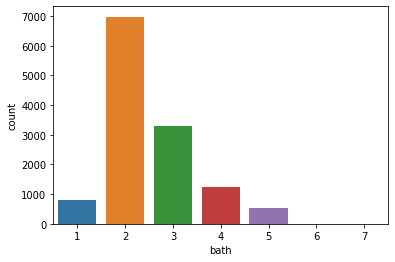

In [125]:
sns.countplot(df['bath'])

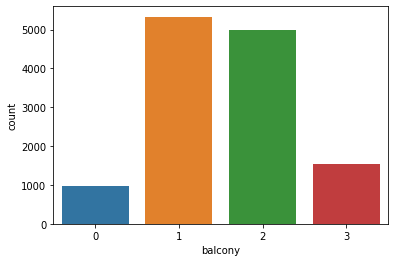

In [126]:
sns.countplot(df['balcony'])

In [127]:
df = df.fillna(0)
df.head(1)

,area_type,location,size,total_sqft,bath,balcony,price,unit_price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606


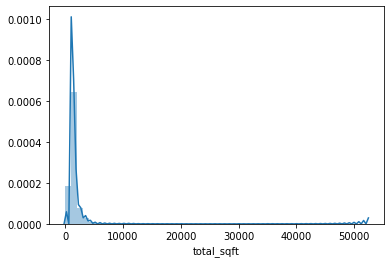

In [128]:
sns.distplot(df['total_sqft'])

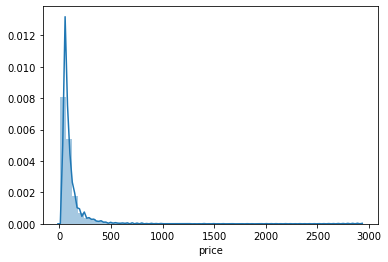

In [129]:
sns.distplot(df['price'])

## 4.4 Correlation Matrix

(6.0, 0.0)

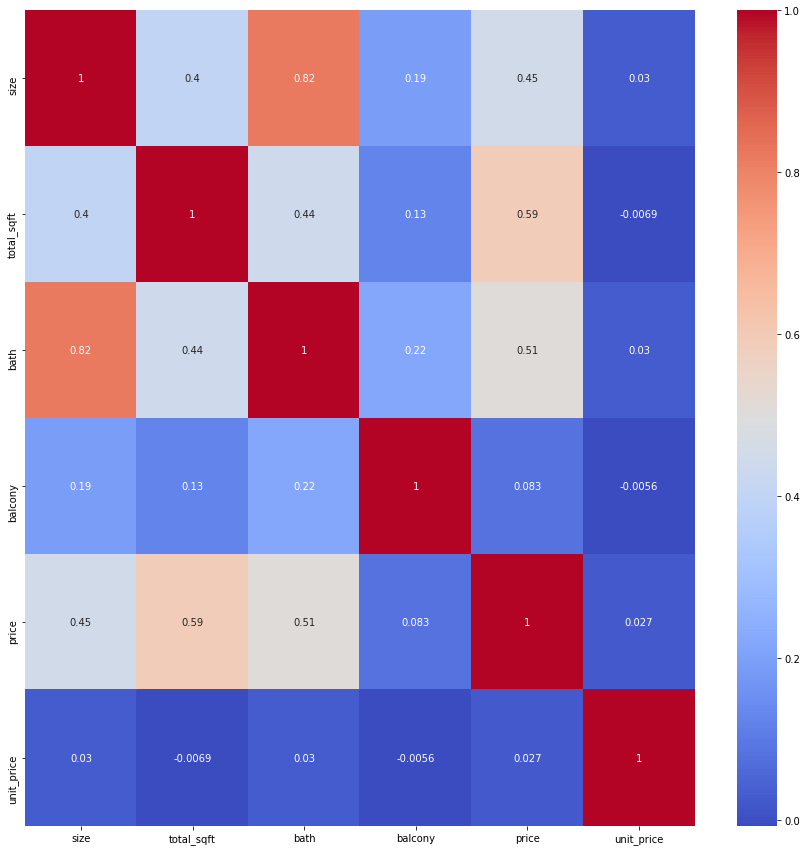

In [130]:
corr = df.corr()
plt.figure(figsize=(15,15))

corr_select = sns.heatmap(corr, annot=True, cmap='coolwarm')
bottom, top = corr_select.get_ylim()

corr_select.set_ylim(bottom + 0.5, top - 0.5)

In [131]:
# Drop highly correlated columns 

def correlated_columns(df, threshold):
    
    col_corr    = set()
    corr_matrix = df.corr()
    
    for i in range(len(corr_matrix.columns)):
    
        for j in range(i):
                   
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                   
    return col_corr

In [132]:
# If the correlation between columns are higher than 80% then drop these columns

corr_features = correlated_columns(df, 0.9)
len(set(corr_features))

0

In [133]:
# Names of the dropping columns

corr_features

set()

In [134]:
# Drop the highly correlated columns

df = df.drop(corr_features, axis=1)

In [135]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,unit_price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2,1,51.00,4250.000000


## 4.5 Label Encoding

In [136]:
# Change the integer columns to numberic columns applied label encoding

# There is also another encoding, there is some kind of discrimination between data
# Distance between the number 
# Thats why one hot encoding is more prefitable...

from sklearn.preprocessing import LabelEncoder

cols = ['area_type','location']
le   = LabelEncoder()

for i in cols:
    df[i] = le.fit_transform(df[i])

In [137]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,unit_price
0,3,83,2,1056.0,2,1,39.07,3699.810606
1,2,63,4,2600.0,5,3,120.00,4615.384615
2,0,237,3,1440.0,2,3,62.00,4305.555556
3,3,166,3,1521.0,3,1,95.00,6245.890861
4,3,158,2,1200.0,2,1,51.00,4250.000000


## 4.6 Feature Selection - Back and Forward Method was applied

In [138]:
df = df[['location','size','total_sqft','bath','price','unit_price']]

# 5- Model Building

## 5.1 - Split Dataset - Dependent and Independent Features

In [139]:
# Split dataset dependent and independent features
# Convert array

X = df.drop(['price'], axis=1)
X = np.array(X)

y = df[['price']].to_numpy()

## 5.2 - Split Train and Test Split

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [141]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

In [142]:
lr_fit.score(X_test,y_test)

0.5092148631823099

## 5.3 K-fold cross_validation

In [143]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [144]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([  0.20299002, -15.05455601,   0.48390928,   0.37070351,
         0.43390993])

## 5.4 Model Selection and Hyperparameter Tuning

In [145]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 

def find_best_model_using_gridsearch_cv(X,y):
    
    algos = {

        # Model 1 - Linear Regression    ------------------------------------------------
        'linear_regression': 

        {
            'model'  : LinearRegression(),
            'params' : {'normalize': [True, False]}
        }, 
        
        
        
        
        # Model 2 - Lasso                 ------------------------------------------------
        'lasso'             :

        {
            'model'      : Lasso(),
            'params'     : {'alpha': [1, 2], 
                            'selection'  : ['random','cyclic']}
        }, 
        
        
        
        
        # Model 3 - DecisionTreeRegressor  ------------------------------------------------        
        'decision_tree': 
        
        {
            'model'  : DecisionTreeRegressor(),
            'params' : {'criterion': ['mse','friedman_mse'],
                        'splitter' : ['best','random']}
        }, 
    }   
    
    
    # cross validation split for 5 split and 20% test size -------------------------------
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    
    # Make a grid search -----------------------------------------------------------------
    
    for model_name, config in algos.items():
    
    
        grid_s = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    
        grid_s.fit(X,y)
    
        scores.append(
        
            {
        
            'model': model_name,
            'best_score' : grid_s.best_score_,
            'best_params': grid_s.best_params_

            })
    
    
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [146]:
find_best_model_using_gridsearch_cv(X,y)

,model,best_score,best_params
0,linear_regression,-2.712609,{'normalize': False}
1,lasso,-2.766016,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.955588,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
